In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Load
train_df = pd.read_csv('../model/data/train.csv', index_col=0) # 캐글 데이터
gen_df = pd.read_csv('../model/data/gen_data_final998.csv', index_col=0) # 생성데이터

# 클래스명 통일
class_dict = {'협박 대화': 0, '갈취 대화':1, '직장 내 괴롭힘 대화':2, '기타 괴롭힘 대화':3, '일반 대화':4}

gen_df['topic'] = '일반 대화'
gen_df = gen_df.rename(columns={'topic':'class'})

# Trainset 취합
data_df = pd.concat([train_df, gen_df], ignore_index=True)

# 클래스명 정수 변환
data_df['class'] = data_df['class'].apply(lambda x: class_dict[x])

In [3]:
data_df

,class,conversation
0,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,0,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,3,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,1,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,1,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
...,...,...
4943,4,너 중학교 때 HOT 팬 아니었어? 방에 브로마이드 붙여놓고 그랬잖아.\n헐 어떻게...
4944,4,대학교 1학년 때 갔던 MT 기억나? 술 마시고 게임하다가 필름 끊겼잖아.\n와 그...
4945,4,나 어릴 때 살던 동네 골목길 사진을 우연히 봤는데 기분이 이상하더라.\n많이 변했...
4946,4,2002 월드컵 때 거리 응원 나갔던 거 생각하면 아직도 소름 돋아.\n와 맞아! ...


In [4]:
# 중복데이터!!!
data_df[data_df.duplicated()]

,class,conversation
392,3,병신이 아이스크림 먹게 돼 있냐?\n난 먹으면 안 돼? 그만 좀 해.\n당연히 안 ...
523,2,과장님. 저 이번에 휴가 좀 갔다와도 되겠습니까.?\n휴가? 왜??\n좀 쉬다가 오...
789,3,야 얘 이 쪽 손가락 세 개밖에 없다\n엥 손가락이 세개밖에 없을 수가 있어?\n봐...
824,3,이야 내동생 여자친구한테 편지쓰네?\n 아 형 돌려줘.\n 어디보자. 사랑하는 여친...
869,2,지현씨 나 소개팅 좀 시켜줘봐\n네? 저 주변에 아는 사람이 없어서요\n아 상사라 ...
...,...,...
3797,3,너 이번 방학 때 쌍꺼풀 수술 하고왔지?\n아닌데?\n아니긴 뭐가 아니야. 눈이 이...
3798,3,안녕하세요 지금 먹방 촬영중인데 촬영가능할까요?\n안돼요\n한번만 안될까요?\n안돼...
3855,3,그 소문 진짜야? 너가 다른 애들 뒷담화하고 다녔다며?\n응? 나 그런 적 없는데?...
3874,3,야 니 왤캐 못생겼냐?\n뭐라그랬냐?\n으 나 보고 말하지마 니 얼굴보면 토나올거 ...


In [5]:
# 중복제거
data_df.drop_duplicates(inplace=True)
data_df

,class,conversation
0,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,0,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,3,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,1,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,1,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
...,...,...
4943,4,너 중학교 때 HOT 팬 아니었어? 방에 브로마이드 붙여놓고 그랬잖아.\n헐 어떻게...
4944,4,대학교 1학년 때 갔던 MT 기억나? 술 마시고 게임하다가 필름 끊겼잖아.\n와 그...
4945,4,나 어릴 때 살던 동네 골목길 사진을 우연히 봤는데 기분이 이상하더라.\n많이 변했...
4946,4,2002 월드컵 때 거리 응원 나갔던 거 생각하면 아직도 소름 돋아.\n와 맞아! ...


In [6]:
# Target 분리
df_X = data_df["conversation"]
df_y = data_df['class']

In [7]:
df_X.shape, df_y.shape

((4844,), (4844,))

In [8]:
df_X = np.array(df_X)
df_y = np.array(df_y)

In [9]:
df_X.shape, df_y.shape

((4844,), (4844,))

In [10]:
# Validation Set 분리
X_train, X_val, y_train, y_val = train_test_split(df_X, df_y,
                                                    test_size=0.2,
                                                    random_state=42, 
                                                    stratify=df_y)

In [11]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((3875,), (969,), (3875,), (969,))

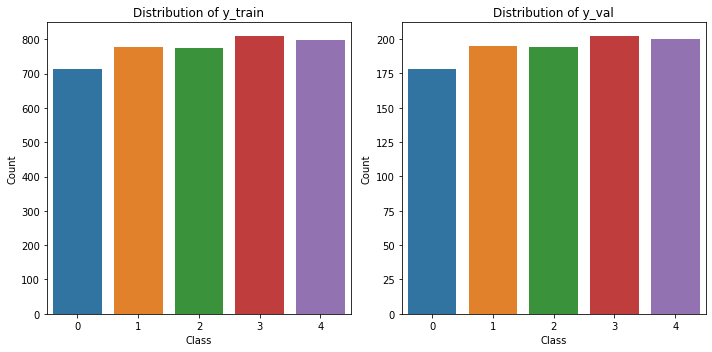

In [12]:
# y_train의 값 분포 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Distribution of y_train')
plt.xlabel('Class')
plt.ylabel('Count')

# y_test의 값 분포 시각화
plt.subplot(1, 2, 2)
sns.countplot(x=y_val)
plt.title('Distribution of y_val')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [17]:
y_train

array([0, 0, 2, ..., 1, 3, 4])

In [14]:
X_train

array(['너네 딸 어디있어?\n 누구시죠?\n 너네 딸이 우리 딸 이렇게 만들었다고! 당장 데려와\n 그럴 수는 없는데?\n 왜 반말이냐 갑자기?\n 니가 먼저 반발 했자나\n 니 딸 칼로 쑤셔버리전에 알아서 데려와\n 미쳤나? 당장 신고 할거야\n 너 죽고 나 죽어볼래? 니 딸 데려와\n 그렇게 극단적으로 나오지 말고 자세히 상황을 이야기 하라고!\n 됐고! 니네 딸이 다 잘못한거야. 당장 죽여버린다.',
       '입금받았으니 물건 빨리 보내시죠\n 당분간 바빠서 그래요\n 장난하십니까.벌써 몇번째에요\n 안보낸다는거 아니잖아요.\n 환불안해주고 오늘 안으로 안보내면 가만안있어요.\n어쩔건데?\n 니네집 찾아가서 다 죽여버린다\n 협박하냐. 물건환불 다없다\n 신고고 뭐고 너 가만안둬\n그러시든가',
       '이사원 이업무좀 내일까지 할수있나\n저 지금 하고있는거도있고 내일까지는 힘들거같습니다.\n지금 오전인데 내일까지 안된다고?\n저 내일까지 제업무하기도 벅찹니다.\n그래서 하기싫어?\n다른팀업무를 왜 제가 해야됩니까.\n자네 야근도 안하고 항상퇴근하던데 야근해서라도 하면되지않나\n아니왜 다른팀업무를 제시간투자해서 하느냐 이말입니다.\n자네 이번승진심사 내가 담당인거알지?\n너무하십니다. 정말',
       ...,
       '내가 너 도와줬으니까 돈 줘\n그런게 어딨어 밥만 사줄게\n돈 내놓으라고\n왜 밥으로 퉁치자\n진짜 인성 뭐냐 더럽네\n쪼금 도와준 거 가지고 생색은\n어쨌든 도와줬잖아\n그래서 뭐 돈 달라고?\n줘야지 돈\n싫어',
       '병신이 아이스크림 먹게 돼 있냐?\n난 먹으면 안 돼? 그만 좀 해.\n당연히 안 되지 너 공부 개못하는 찐따잖아.\n야 닭대가리가 말도 하네 동물농장 나가자.\n너네 학교폭력으로 신고하기 전에 그만 해.\n아이고 무서워라 살려주세요 으헝헝\n제발 좀 저리 가.\n나였으면 아이스크림 먹을 시간에 공부한다.\n멈춰!\n저러니까 쳐맞고 다니지',
       '와 이 피규어 한정판이래! 

In [18]:
# 각각 합치기
train = {'class': y_train, 'conversation': X_train}
trainset = pd.DataFrame(train)
trainset

,class,conversation
0,0,너네 딸 어디있어?\n 누구시죠?\n 너네 딸이 우리 딸 이렇게 만들었다고! 당장 ...
1,0,입금받았으니 물건 빨리 보내시죠\n 당분간 바빠서 그래요\n 장난하십니까.벌써 몇번...
2,2,이사원 이업무좀 내일까지 할수있나\n저 지금 하고있는거도있고 내일까지는 힘들거같습니...
3,1,안녕 꼬마야 몇살이야\n안녕하세요 6살이요\n손에 든건뭐야?\n돈이에요 엄마가 애호...
4,1,아니 이자가 왜 이리 늘어요? 너무한거 아니에요\n뭐 새끼야 애초에 돈을 빌렸으면 ...
...,...,...
3870,4,이상으로 이번 프로젝트의 주요 성과를 말씀드렸습니다. 질문 있으시면 부탁드립니다.\...
3871,1,저기요 저 1000원만 주실 수 있나요?\n네? 제가 왜요?\n제가 버스비가 없어서...
3872,1,내가 너 도와줬으니까 돈 줘\n그런게 어딨어 밥만 사줄게\n돈 내놓으라고\n왜 밥으...
3873,3,병신이 아이스크림 먹게 돼 있냐?\n난 먹으면 안 돼? 그만 좀 해.\n당연히 안 ...


In [20]:
# 각각 합치기
validation = {'class': y_val, 'conversation': X_val}
val_set = pd.DataFrame(validation)
val_set

,class,conversation
0,3,최민철 너 내일까지 나 대신 내 깜지 쫌 써와라.\n응? 그거 선생님께서 오늘 시험...
1,3,고모 오셨어요?\n그래 너 이번 모의고사에서 몇 등급 받았니?\n5등급이요.\n5등...
2,1,야 마트가서 먹을것 좀 사와.\n돈은요?\n아 담에 줄게. 일단 사와 새끼야.\n저...
3,2,사장님 저기 말할게 있는데요\n뭔데 임마\n아니 우리 게임회사는 전체이용가 게임이잖...
4,1,이 사장님 이거 오랜만입니다?\n아.자네 어쩐 일인가.\n어쩐 일이냐뇨 섭섭하네요....
...,...,...
964,2,이게뭐야 김사원 똑바로 안해?\n뭐가요\n말대꾸하지마\n예?\n이게어디서\n죄송합니...
965,1,뒤로 횡령하신 전적이 있으시던데?\n어디서 뭘 봤는지 모르겠지만 잘못 봤어.\n동료...
966,0,네? 진짜 작작하고 그만하세요 경찰에 신고하기전에\n너 안그래도 경찰에 신고 할거잖...
967,1,어이 너희 집 어딘지 이제 아는데.\n선생님 제발 우리 집에는 오지 마세요.\n그럼...


In [26]:
trainset.to_csv('trainset_v1.csv', index=False)
val_set.to_csv('valset_v1.csv', index=False)

In [27]:
temp = pd.read_csv('trainset_v1.csv')
temp

,class,conversation
0,0,너네 딸 어디있어?\n 누구시죠?\n 너네 딸이 우리 딸 이렇게 만들었다고! 당장 ...
1,0,입금받았으니 물건 빨리 보내시죠\n 당분간 바빠서 그래요\n 장난하십니까.벌써 몇번...
2,2,이사원 이업무좀 내일까지 할수있나\n저 지금 하고있는거도있고 내일까지는 힘들거같습니...
3,1,안녕 꼬마야 몇살이야\n안녕하세요 6살이요\n손에 든건뭐야?\n돈이에요 엄마가 애호...
4,1,아니 이자가 왜 이리 늘어요? 너무한거 아니에요\n뭐 새끼야 애초에 돈을 빌렸으면 ...
...,...,...
3870,4,이상으로 이번 프로젝트의 주요 성과를 말씀드렸습니다. 질문 있으시면 부탁드립니다.\...
3871,1,저기요 저 1000원만 주실 수 있나요?\n네? 제가 왜요?\n제가 버스비가 없어서...
3872,1,내가 너 도와줬으니까 돈 줘\n그런게 어딨어 밥만 사줄게\n돈 내놓으라고\n왜 밥으...
3873,3,병신이 아이스크림 먹게 돼 있냐?\n난 먹으면 안 돼? 그만 좀 해.\n당연히 안 ...


In [28]:
temp = pd.read_csv('valset_v1.csv')
temp

,class,conversation
0,3,최민철 너 내일까지 나 대신 내 깜지 쫌 써와라.\n응? 그거 선생님께서 오늘 시험...
1,3,고모 오셨어요?\n그래 너 이번 모의고사에서 몇 등급 받았니?\n5등급이요.\n5등...
2,1,야 마트가서 먹을것 좀 사와.\n돈은요?\n아 담에 줄게. 일단 사와 새끼야.\n저...
3,2,사장님 저기 말할게 있는데요\n뭔데 임마\n아니 우리 게임회사는 전체이용가 게임이잖...
4,1,이 사장님 이거 오랜만입니다?\n아.자네 어쩐 일인가.\n어쩐 일이냐뇨 섭섭하네요....
...,...,...
964,2,이게뭐야 김사원 똑바로 안해?\n뭐가요\n말대꾸하지마\n예?\n이게어디서\n죄송합니...
965,1,뒤로 횡령하신 전적이 있으시던데?\n어디서 뭘 봤는지 모르겠지만 잘못 봤어.\n동료...
966,0,네? 진짜 작작하고 그만하세요 경찰에 신고하기전에\n너 안그래도 경찰에 신고 할거잖...
967,1,어이 너희 집 어딘지 이제 아는데.\n선생님 제발 우리 집에는 오지 마세요.\n그럼...
